In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import re

In [3]:
data = pd.read_csv(r"C:\Users\MURAT\Desktop\tripadvisor_hotel_reviews.csv")

In [4]:
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [6]:
data.isna().sum()

Review    0
Rating    0
dtype: int64

In [7]:
print('Max Rating value is ' + str(data['Rating'].max()))
print('Min Rating value is ' + str(data['Rating'].min()))

Max Rating value is 5
Min Rating value is 1


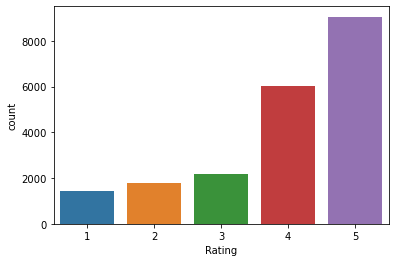

In [8]:
sns.countplot(data['Rating'])
plt.show()

In [9]:
data['review_length'] = data['Review'].apply(len)
data.head()

,Review,Rating,review_length
0,nice hotel expensive parking got good deal sta...,4,593
1,ok nothing special charge diamond member hilto...,2,1689
2,nice rooms not 4* experience hotel monaco seat...,3,1427
3,"unique, great stay, wonderful time hotel monac...",5,600
4,"great stay great stay, went seahawk game aweso...",5,1281


In [10]:
df_5 = data[data['Rating'] == 5]
df_4 = data[data['Rating'] == 4]
df_3 = data[data['Rating'] == 3]
df_2 = data[data['Rating'] == 2]
df_1 = data[data['Rating'] == 1]

In [11]:
print('Review Length of 5 rating reviews = ' + str(df_5.review_length.mean()))
print('Review Length of 4 rating reviews = ' + str(df_4.review_length.mean()))
print('Review Length of 3 rating reviews = ' + str(df_3.review_length.mean()))
print('Review Length of 2 rating reviews = ' + str(df_2.review_length.mean()))
print('Review Length of 1 rating reviews = ' + str(df_1.review_length.mean()))

Review Length of 5 rating reviews = 661.6964877402253
Review Length of 4 rating reviews = 745.3399569465143
Review Length of 3 rating reviews = 784.6648351648352
Review Length of 2 rating reviews = 867.0027886224206
Review Length of 1 rating reviews = 769.5348346235046


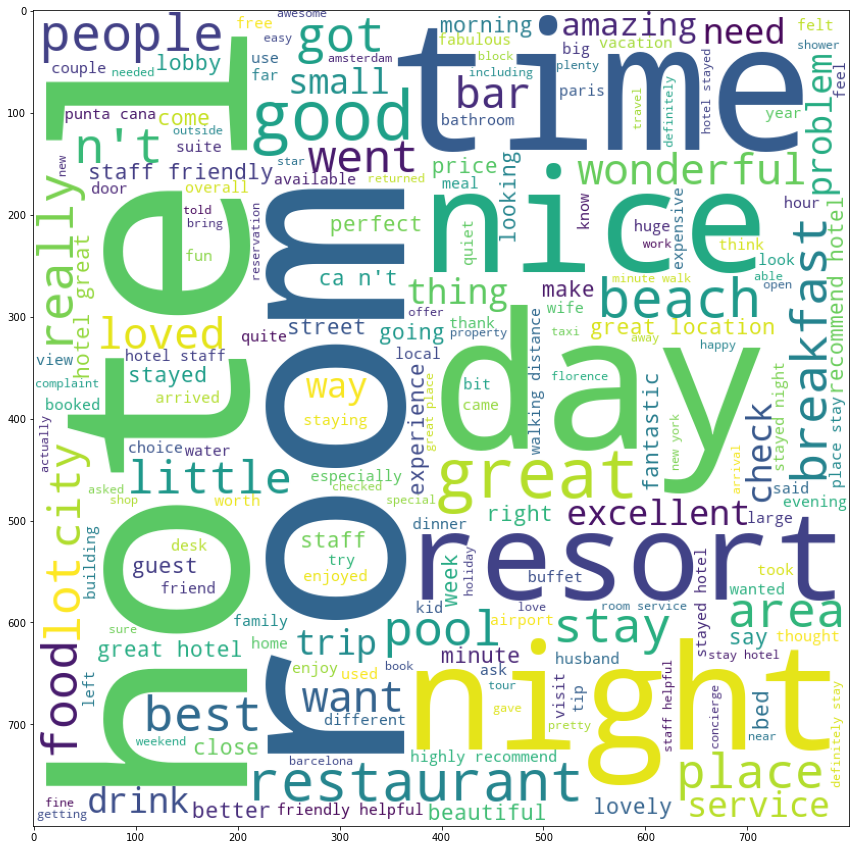

In [12]:
plt.figure(figsize=(15,15))
wc1 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_5['Review']))

plt.imshow(wc1)

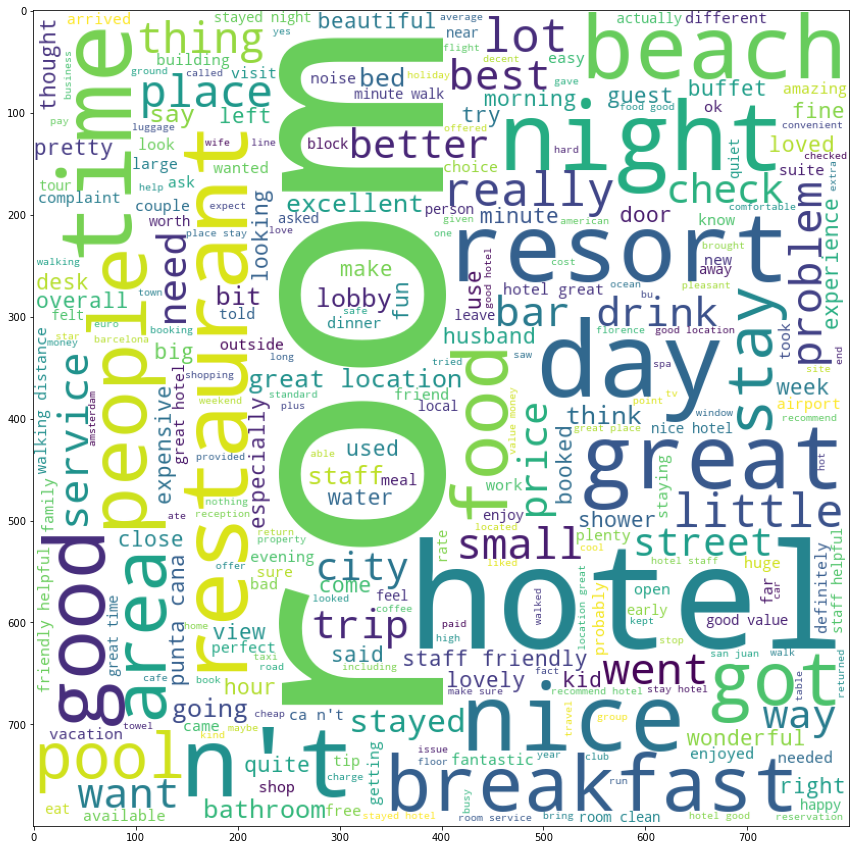

In [13]:
plt.figure(figsize=(15,15))
wc2 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_4['Review']))

plt.imshow(wc2)

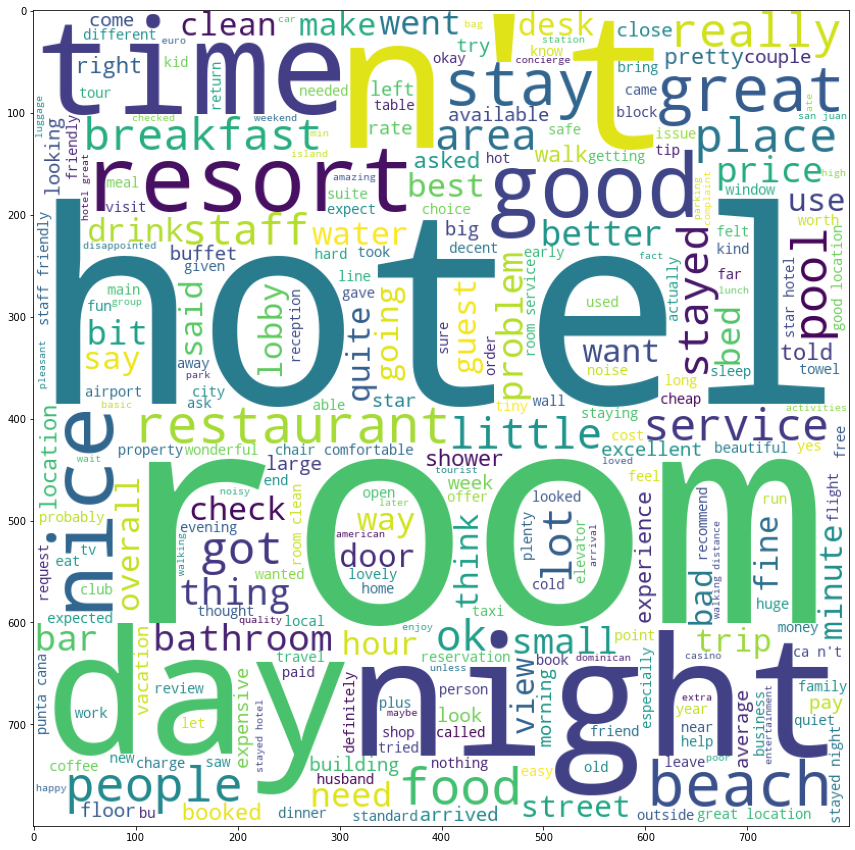

In [14]:
plt.figure(figsize=(15,15))
wc3 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_3['Review']))

plt.imshow(wc3)

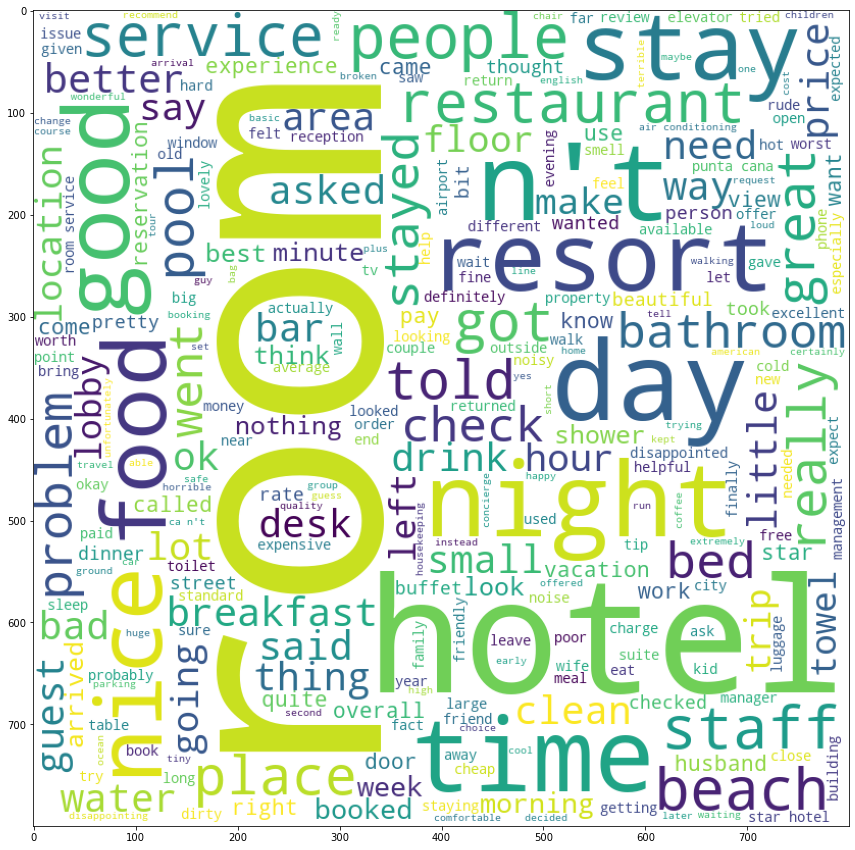

In [15]:
plt.figure(figsize=(15,15))
wc4 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_2['Review']))

plt.imshow(wc4)

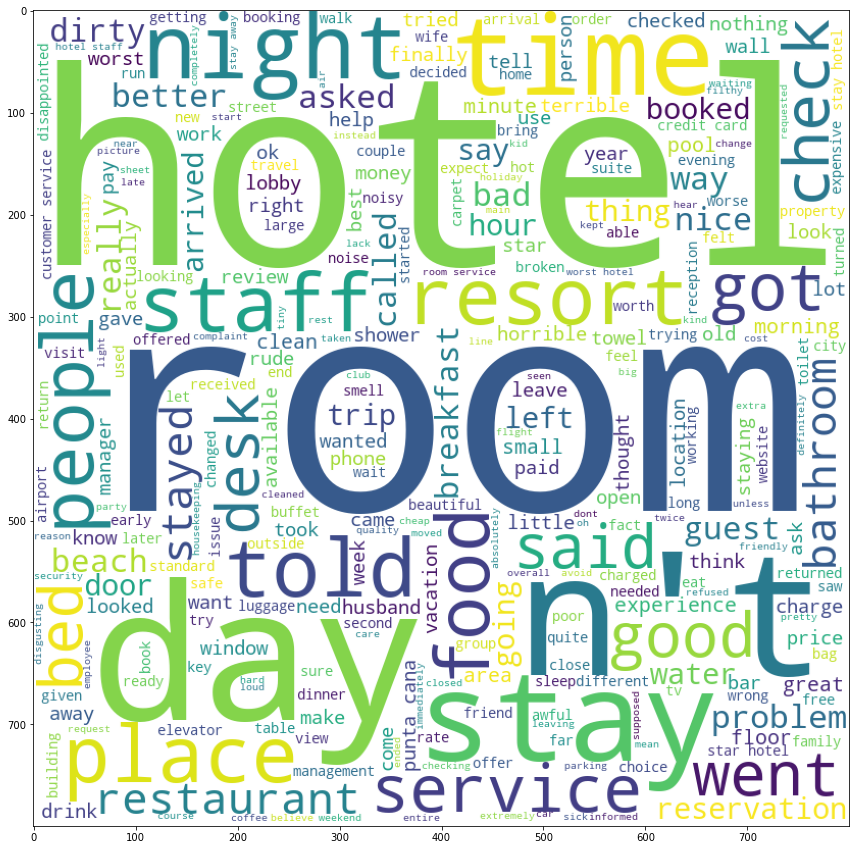

In [16]:
plt.figure(figsize=(15,15))
wc5 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df_1['Review']))

plt.imshow(wc5)

In [17]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [18]:
a=data.iloc[0,0]
a

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [19]:
a=re.sub('[^a-zA-Z0-9]',' ',a)
a=a.lower().split()
a

['nice',
 'hotel',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversary',
 'arrived',
 'late',
 'evening',
 'took',
 'advice',
 'previous',
 'reviews',
 'did',
 'valet',
 'parking',
 'check',
 'quick',
 'easy',
 'little',
 'disappointed',
 'non',
 'existent',
 'view',
 'room',
 'room',
 'clean',
 'nice',
 'size',
 'bed',
 'comfortable',
 'woke',
 'stiff',
 'neck',
 'high',
 'pillows',
 'not',
 'soundproof',
 'like',
 'heard',
 'music',
 'room',
 'night',
 'morning',
 'loud',
 'bangs',
 'doors',
 'opening',
 'closing',
 'hear',
 'people',
 'talking',
 'hallway',
 'maybe',
 'just',
 'noisy',
 'neighbors',
 'aveda',
 'bath',
 'products',
 'nice',
 'did',
 'not',
 'goldfish',
 'stay',
 'nice',
 'touch',
 'taken',
 'advantage',
 'staying',
 'longer',
 'location',
 'great',
 'walking',
 'distance',
 'shopping',
 'overall',
 'nice',
 'experience',
 'having',
 'pay',
 '40',
 'parking',
 'night']

In [20]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MURAT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
sw=set(stopwords.words('english'))
print(sw)

{"haven't", 'she', "aren't", 'by', 'once', 'its', 'few', 'against', 'and', "wasn't", 'same', 'a', 'weren', 'himself', 'both', 'off', 'to', 'of', 'those', "needn't", 'such', "wouldn't", 'just', 'about', 'our', 'yours', 'over', 'being', 'yourself', 'any', 'will', 'i', 'each', 'why', 'because', "mustn't", 'we', 'be', 'are', 'below', 'his', 'all', 'too', 'her', 'before', 'were', 'shouldn', 'or', 'ain', "hasn't", "isn't", 'so', 'now', 'me', "you'll", 'mightn', "you'd", 'on', 'am', 'yourselves', 'do', 'o', 'they', 'themselves', "couldn't", 'ourselves', 'doing', 'above', 'my', 'there', 'an', 'while', 'this', 'the', 'no', 'during', 'can', "won't", 'whom', 'theirs', 'him', 'don', 'who', 'but', 'down', 're', 'that', 'myself', 'he', 'with', 'hadn', "you've", 'd', "she's", 'ours', 'most', 'only', "hadn't", 'herself', 'then', 'isn', "that'll", 'further', 'is', 'again', 'does', 'nor', "mightn't", 'shan', 'has', 'you', 'out', 'how', 'than', 't', 'own', 'not', 'couldn', 'through', 'here', 's', 'been',

In [22]:
clean_word=[i for i in a if not i in sw]
len(clean_word)

82

In [23]:
sen=' '.join(clean_word)
sen

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay 40 parking night'

In [24]:
def text_preprocessing(a):
  a=re.sub('[^a-zA-Z]',' ',a)
  a=a.lower().split()
  ps=PorterStemmer()
  clean_word=[ps.stem(i) for i in a if not i in sw]
  sen=' '.join(clean_word)
  return sen

In [25]:
data['clean_word']=data["Review"].apply(text_preprocessing)
data.head()

,Review,Rating,review_length,clean_word
0,nice hotel expensive parking got good deal sta...,4,593,nice hotel expens park got good deal stay hote...
1,ok nothing special charge diamond member hilto...,2,1689,ok noth special charg diamond member hilton de...
2,nice rooms not 4* experience hotel monaco seat...,3,1427,nice room experi hotel monaco seattl good hote...
3,"unique, great stay, wonderful time hotel monac...",5,600,uniqu great stay wonder time hotel monaco loca...
4,"great stay great stay, went seahawk game aweso...",5,1281,great stay great stay went seahawk game awesom...


In [26]:
data['review_length2'] = data['clean_word'].apply(len)
data.head()

,Review,Rating,review_length,clean_word,review_length2
0,nice hotel expensive parking got good deal sta...,4,593,nice hotel expens park got good deal stay hote...,481
1,ok nothing special charge diamond member hilto...,2,1689,ok noth special charg diamond member hilton de...,1407
2,nice rooms not 4* experience hotel monaco seat...,3,1427,nice room experi hotel monaco seattl good hote...,1174
3,"unique, great stay, wonderful time hotel monac...",5,600,uniqu great stay wonder time hotel monaco loca...,506
4,"great stay great stay, went seahawk game aweso...",5,1281,great stay great stay went seahawk game awesom...,1058


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [28]:
cv=CountVectorizer()
X=cv.fit_transform(data["clean_word"]).toarray()
y=data["Rating"]

In [29]:
print("X shape: ", X.shape)
print("y: shape ", y.shape)

X shape:  (20491, 35692)
y: shape  (20491,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (15368, 35692)
X Test  :  (5123, 35692)
Y Train :  (15368,)
Y Test  :  (5123,)


In [31]:
LR = LogisticRegression()
DTR = DecisionTreeClassifier()
RFR = RandomForestClassifier()
KNR = KNeighborsClassifier()
NB = MultinomialNB()

In [32]:
li = [LR,DTR,RFR,KNR,NB]
d = {}
for i in li:
    i.fit(X_train,y_train)
    ypred = i.predict(X_test)
    print(i,":",accuracy_score(y_test,ypred)*100)
    d.update({str(i):i.score(X_test,y_test)*100})

LogisticRegression() : 58.65703689244584
DecisionTreeClassifier() : 45.403084130392344
RandomForestClassifier() : 51.415186414210424
KNeighborsClassifier() : 45.77396056997853
MultinomialNB() : 58.325200078079256


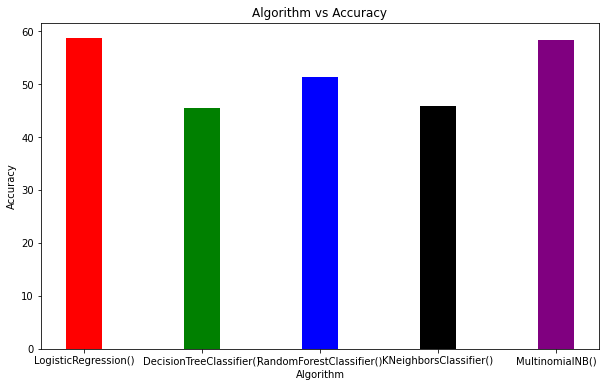

In [42]:

plt.figure(figsize=(10, 6))
plt.title("Algorithm vs Accuracy")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.bar(d.keys(),d.values(),
        width = 0.3, color = ['red', 'green','blue','black','purple'])
plt.show()